# <center>Лабораторна робота №4. <br> Візуальний аналіз даних про пасажирів Титаніку</center>

**Заповніть код в клітинках замість "Ваш код тут"**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Зчитуємо навчальну вибірку.**

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive

In [19]:
# from google.colab import drive
# drive.mount('/content/gdrive') 

In [20]:
# !ls gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lab_3_4/data	

In [21]:
# шлях до папки з даними на моєму google drive, відредагуйте згідно вашого випадку
data_folder = "data" 

In [22]:
#train_df = pd.read_csv("data/titanic_train.csv", index_col='PassengerId') 

train_df = pd.read_csv( data_folder+'/titanic_train.csv', index_col='PassengerId' )

In [23]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Відкинемо ознаку `Cabin`, а потім – всі рядки, де є пропуски.**

In [26]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності ознак `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas чи `pairplot` Seaborn).**

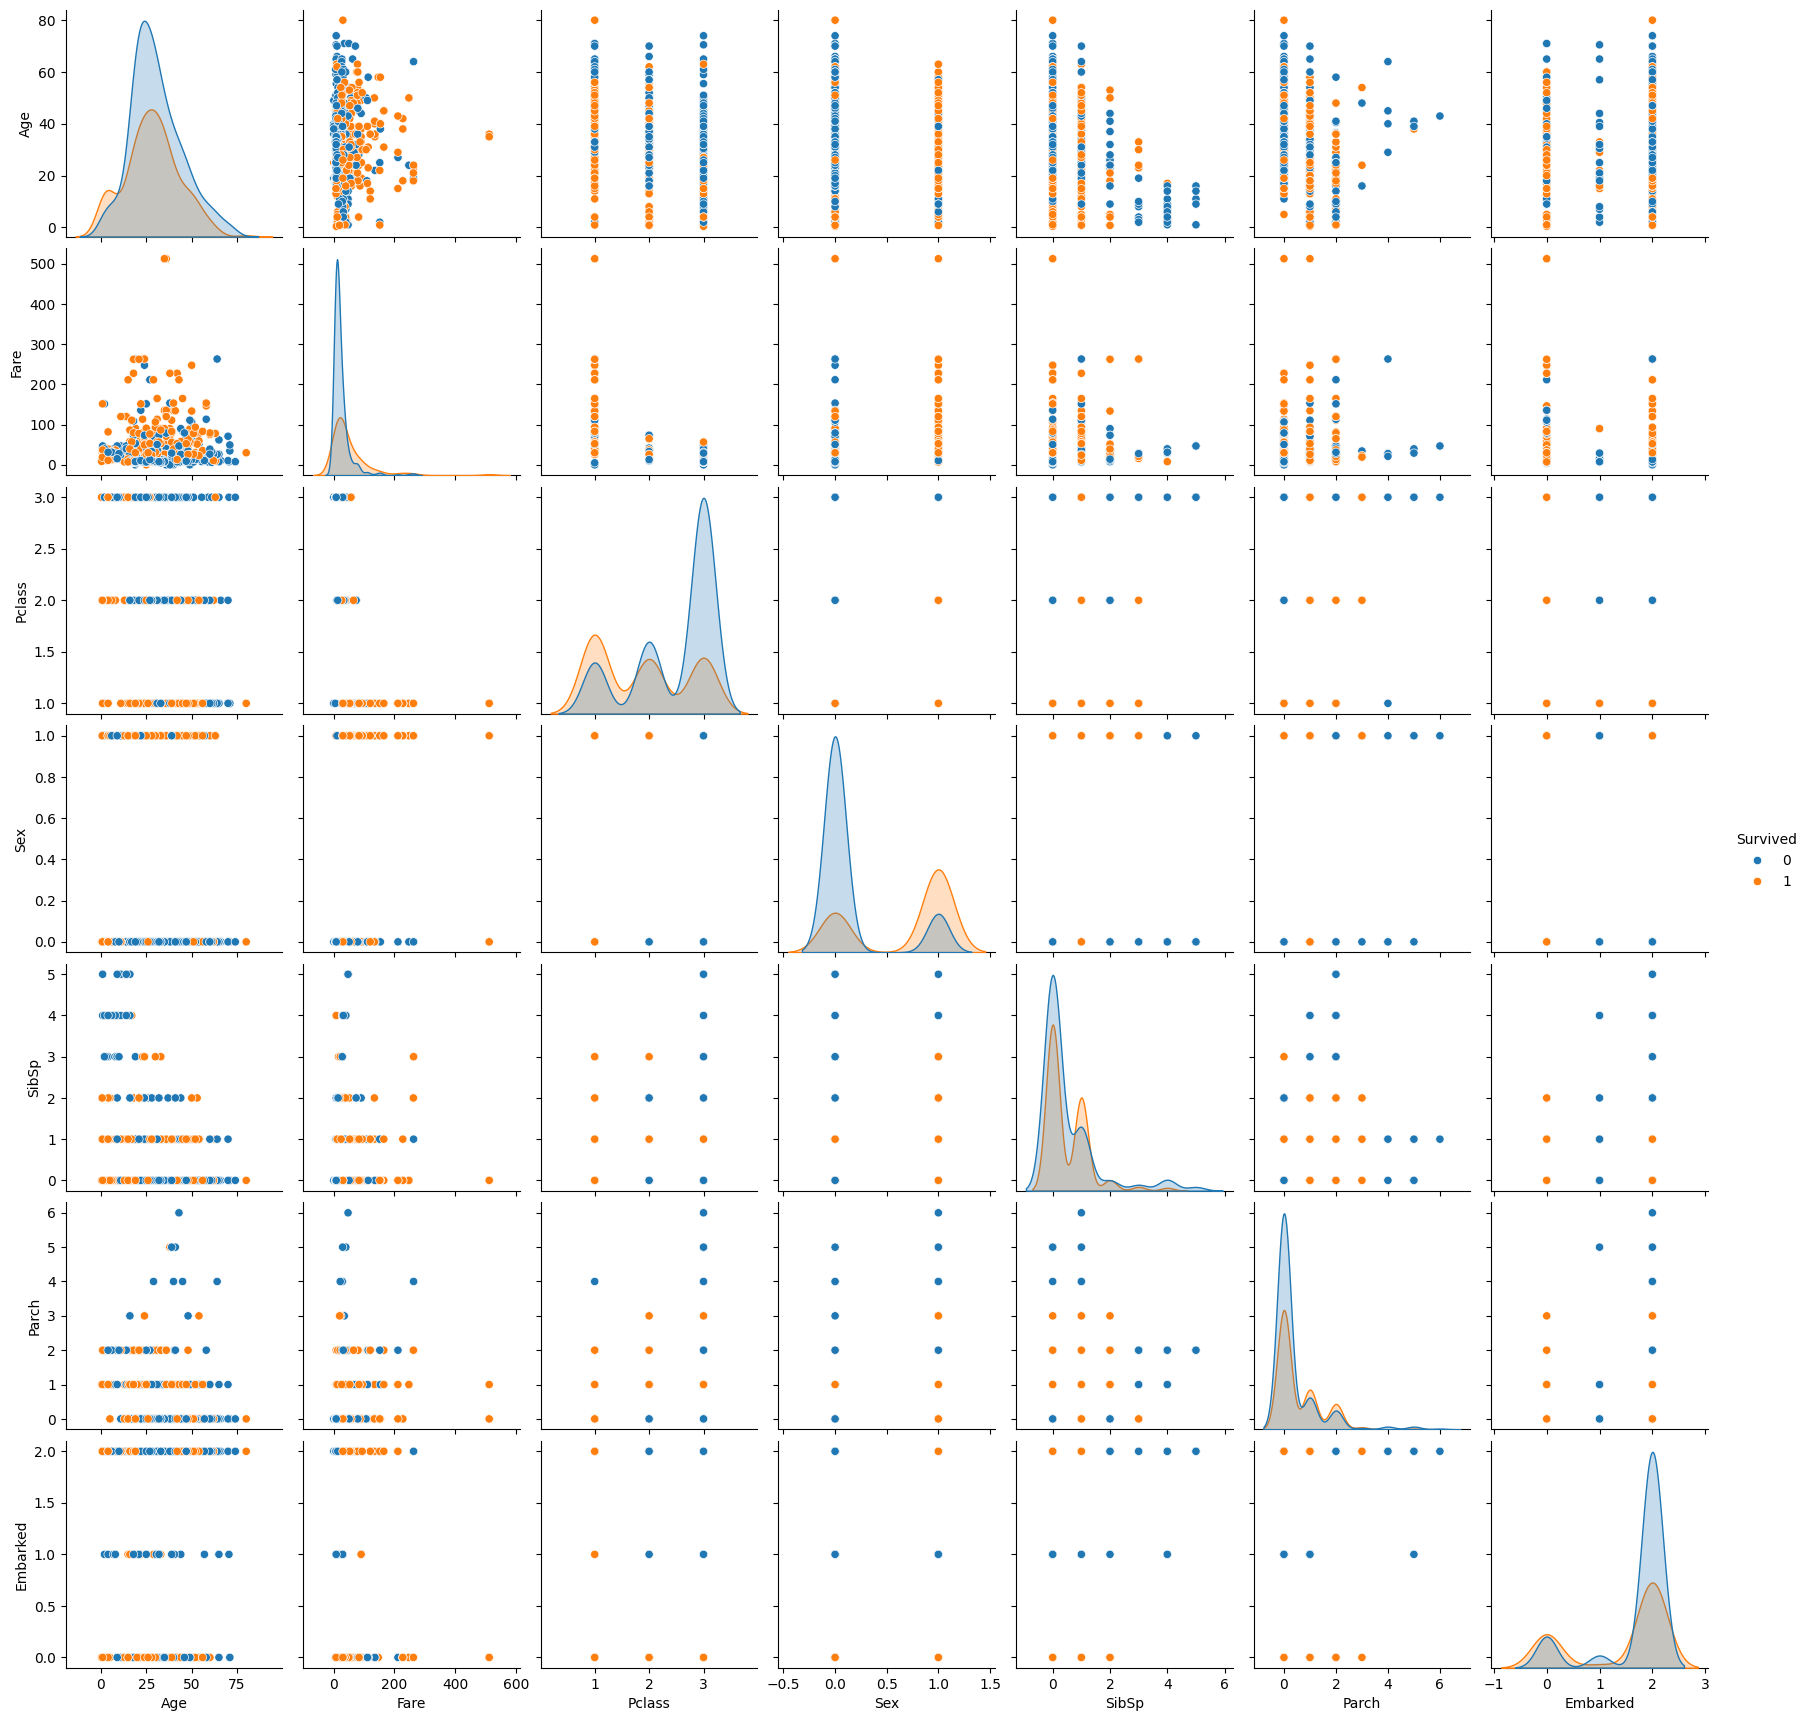

In [27]:
# Перетворюємо 'Sex' та 'Embarked' на числові значення для побудови графіків
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Вибираємо відповідні стовпці
selected_columns = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']

# Побудова pairplot
sns.pairplot(train_df[selected_columns], hue='Survived')
plt.show()

**Як плата за білет (`Fare`) залежить від класу каюти (`Pclass`)? Побудуйте boxplot.**

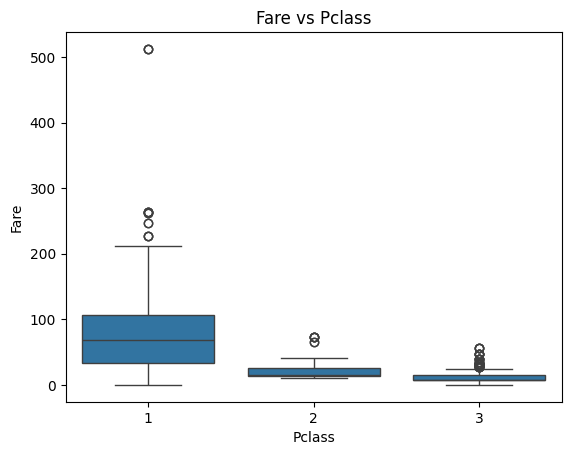

In [28]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare vs Pclass')
plt.show()

**Такий boxplot виходить не дуже красивим із-за викидів.** 

**Опціонально: створіть ознаку `Fare_no_out` (вартість без викидів), в якій виключається вартість, що відрізняється від середнього по класу більш ніж на 2 стандартних відхилення. Важливо: потрібно виключити викиди саме в залежності від класу каюти. Інакше виключатися будуть тільки найбільші (1 клас) і малі (3 клас) вартості.**

In [30]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - fare_pclass1.mean()).abs() <= 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - fare_pclass2.mean()).abs() <= 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - fare_pclass3.mean()).abs() <= 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = pd.concat([fare_pclass1_no_out, fare_pclass2_no_out, fare_pclass3_no_out])

**Яке відношення загиблих і виживших в залежності від статі? Відобразіть з допомогою Seaborn.countplot з аргументом hue.**

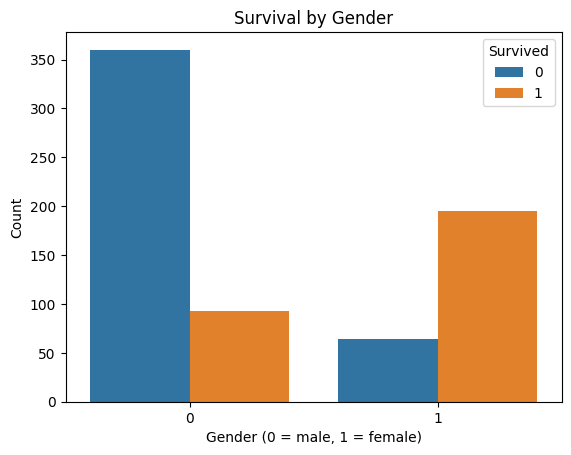

In [31]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.xlabel('Gender (0 = male, 1 = female)')
plt.ylabel('Count')
plt.show()

**Яке співідношення загиблих і виживших в залежності від класу каюти? Відобразівть за допомогою Seaborn.countplot з аргументом hue.**

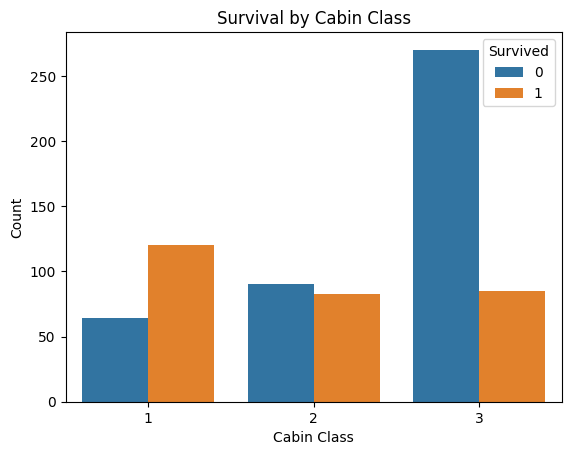

In [33]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Cabin Class')
plt.xlabel('Cabin Class')
plt.ylabel('Count')
plt.show()

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодші 30 років, похилого віку – старші 60 років.**

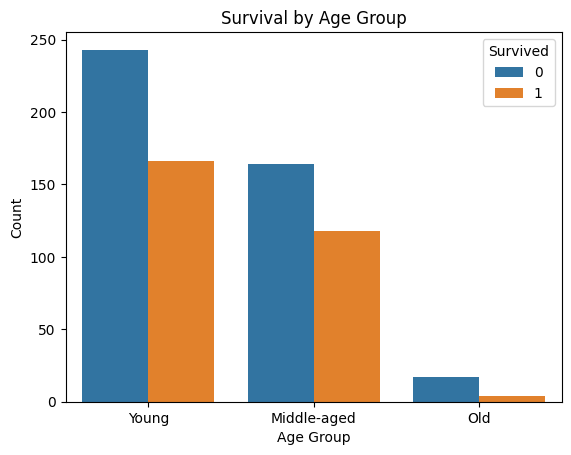

In [34]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 30, 60, 80], labels=['Young', 'Middle-aged', 'Old'])

sns.countplot(x='AgeGroup', hue='Survived', data=train_df)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()